# Feature differentiating

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import scipy.stats as stats
import time
import stationarity as st

import sys
sys.path.insert(0, '..')
from multiprocess import mp_pandas_obj

In [51]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [50]:
df.iloc[::20, :]

,open,high,low,close,volume
time,,,,,
2017-08-17 04:21:13.356,4261.48,4280.56,4261.48,4266.29,5.002297
2017-08-17 11:01:00.063,4460.00,4470.00,4459.18,4459.18,7.922343
2017-08-17 14:52:00.065,4477.53,4477.53,4457.43,4457.43,5.726718
2017-08-17 16:10:46.745,4292.11,4293.61,4255.30,4287.78,5.070972
2017-08-17 18:17:00.515,4231.87,4282.43,4231.87,4278.01,5.026406
...,...,...,...,...,...
2021-06-19 16:14:51.220,35976.55,35995.81,35961.31,35986.59,5.221115
2021-06-19 16:18:46.436,35879.54,35900.00,35879.00,35893.49,5.890228
2021-06-19 16:20:07.959,35837.35,35849.33,35822.81,35822.81,5.302133


In [29]:
df = df[-80_000:]

In [30]:
# Set indicator to be pandas series (ie df.close)
ind, x = df.close, df.close

In [6]:
x = np.log(ind).cumsum()
x

time
2017-08-17 04:21:13.356    8.358500e+00
2017-08-17 04:29:19.766    1.671728e+01
2017-08-17 04:33:00.057    2.507617e+01
2017-08-17 04:39:32.027    3.344263e+01
2017-08-17 04:43:05.191    4.180909e+01
                               ...     
2021-06-19 16:27:04.502    1.112513e+08
2021-06-19 16:27:20.667    1.112513e+08
2021-06-19 16:27:26.627    1.112513e+08
2021-06-19 16:27:44.405    1.112514e+08
2021-06-19 16:27:48.270    1.112514e+08
Name: close, Length: 11798850, dtype: float64

In [31]:
start = time.time()
new_ind = st.frac_diff_ffd(df.close.to_frame(),0.2,thres=1e-5) #x.to_frame() or df.close.to_frame()
print(time.time()-start)

450.1646828651428


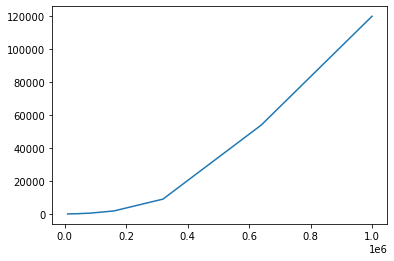

In [48]:
plt.plot([10_000, 20_000, 40_000, 80_000, 160_000, 320_000, 640_000, 1_000_000], [15, 45, 131, 450, 1_800, 9_000, 54_000, 120_000])

## Tests

In [ ]:
joined = new_ind.join(ind.rename('original'), how='left') 
joined.corr()

In [ ]:
adfuller(new_ind)